## Machine Learning Assignment 2
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)

#### Cross Validation VS No-Cross Validation
1. In the below code, we will take 6 datasets, 3 for Regression and 3 for Classification.
2. For Classification Datasets, we will use Logistic Regression due to their simple nature as it will help us clearly identify the difference of using CV.
3. For Regression Datasets, we will use Linear Regression due to their simple nature as it will help us clearly identify the difference of using CV.
4. Also we will use Random Forest Algorithm for both to use as reference due to the smart and complex nature of the Algorithm to be treated as a benchmark.
5. For CV, we will use Stratified K Fold Cross Validation with different values of K as it is the most simplistic and requires least training time.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from lazypredict.Supervised import LazyClassifier

pd.options.display.float_format = '{:,.4f}'.format

In [17]:
# Data Loader loads data from UCI-ML Repo
def load_datasets():
    # Classification Datasets
    c_cancer = pd.read_csv("./Classification.CancerMB.csv").iloc[:, :32]
    c_mice_expression = pd.read_csv("./Classification.Mice.Expression.csv")#.iloc[:, :25]
    c_adult_income = pd.read_csv("./Classification.Adult.Income.csv")
    # Regression Datasets
    r_life_expectancy = pd.read_csv("./Regression.Life.Expectancy.csv")
    
    return c_cancer, c_mice_expression, c_adult_income, r_life_expectancy


In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64' and df[column].dtype != 'int64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())

        
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value = False):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

In [6]:
# Runs LogisticRegression CV on default settings and k Folds
def LogisticRegressionCV(df, target_name, folds):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    results = []

    # Initialize the KNN classifier
    lr_classifier = LogisticRegression()
    rf_classifier = RandomForestClassifier()
    
    # Initialize k-fold cross-validation where folds > 0
    for k in folds:
        if k > 0:
            k_fold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
            lr_scores = cross_val_score(lr_classifier, X, y, cv=k_fold, scoring='accuracy')
            rf_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='accuracy')
            lr_mean_accuracy = lr_scores.mean()
            rf_mean_accuracy = rf_scores.mean()
            results.append({'k': k, 'Logistic Regression Accuracy': lr_mean_accuracy, 'Random Forest Accuracy': rf_mean_accuracy})
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            lr_classifier.fit(X_train, y_train)
            lr_pred = lr_classifier.predict(X_test)
            lr_accuracy = accuracy_score(y_test, lr_pred)
            rf_classifier.fit(X_train, y_train)
            rf_pred = rf_classifier.predict(X_test)
            rf_accuracy = accuracy_score(y_test, rf_pred)
            results.append({'k': k, 'Logistic Regression Accuracy': lr_accuracy, 'Random Forest Accuracy': rf_accuracy})
    
    df = pd.DataFrame(results)
    return df

In [7]:
# Runs LogisticRegression CV on default settings and k Folds
def LinearRegressionCV(df, target_name, folds):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    results = []

    # Initialize the KNN classifier
    lr_classifier = LinearRegression()
    rf_classifier = RandomForestRegressor()
    
    # Initialize k-fold cross-validation where folds > 0
    for k in folds:
        print(k)
        if k > 0:
            k_fold = KFold(n_splits=k, shuffle=True, random_state=42)
            lr_r2_scores = cross_val_score(lr_classifier, X, y, cv=k_fold, scoring='r2')
            rf_r2_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='r2')
            lr_mse_scores = cross_val_score(lr_classifier, X, y, cv=k_fold, scoring='neg_mean_squared_error')
            rf_mse_scores = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='neg_mean_squared_error')
            lr_mean_r2 = lr_r2_scores.mean()
            rf_mean_r2 = rf_r2_scores.mean()
            lr_mean_mse = lr_mse_scores.mean()
            rf_mean_mse = rf_mse_scores.mean()
            results.append({'k': k, 'Logistic Regression R2 Score': lr_mean_r2, 'Logistic Regression MSE Score': -lr_mean_mse, 'Random Forest R2 Score': rf_mean_r2, 'Random Forest MSE Score': -rf_mean_mse})
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            lr_classifier.fit(X_train, y_train)
            lr_pred = lr_classifier.predict(X_test)
            lr_r2_score = r2_score(y_test, lr_pred)
            lr_mse_score = mean_squared_error(y_test, lr_pred)
            rf_classifier.fit(X_train, y_train)
            rf_pred = rf_classifier.predict(X_test)
            rf_r2_score = r2_score(y_test, rf_pred)
            rf_mse_score = mean_squared_error(y_test, rf_pred)
            results.append({'k': k, 'Logistic Regression R2 Score': lr_r2_score, 'Logistic Regression MSE Score': lr_mse_score, 'Random Forest R2 Score': rf_r2_score, 'Random Forest MSE Score': rf_mse_score})
        print(results)
    df = pd.DataFrame(results)
    return df

In [8]:
# Plot a Number of Folds vs Accuracy graph for Classification Dataset
def plot_model_accuracy_graph(df):
    plt.figure(figsize=(7, 4))
    
    # Plotting line for Logistic Regression Accuracy
    sns.lineplot(x=df['k'], y=df['Logistic Regression Accuracy'], label='Logistic Regression Accuracy', marker='o')

    # Plotting line for Random Forest Accuracy
    sns.lineplot(x=df['k'], y=df['Random Forest Accuracy'], label='Random Forest Accuracy', marker='o')

    plt.title('Model Accuracy by Number of Folds')
    plt.xlabel('Number of Folds (k)')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
# Plot a Number of Folds vs R2 Score graph for Regression Dataset
def plot_model_r2_graph(df):
    plt.figure(figsize=(7, 4))
    
    # Plotting line for Logistic Regression Accuracy
    sns.lineplot(x=df['k'], y=df['Linear Regression R2 Score'], label='Linear Regression R2 Score', marker='o')

    # Plotting line for Random Forest Accuracy
    sns.lineplot(x=df['k'], y=df['Random Forest R2 Score'], label='Random Forest R2 Score', marker='o')

    plt.title('Model R2 Score by Number of Folds')
    plt.xlabel('Number of Folds (k)')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [33]:
# Plot a Number of Folds vs MSE Score graph for Regression Dataset
def plot_model_mse_graph(df):
    plt.figure(figsize=(7, 4))
    
    # Plotting line for Logistic Regression Accuracy
    sns.lineplot(x=df['k'], y=df['Linear Regression MSE Score'], label='Linear Regression MSE Score', marker='o')

    # Plotting line for Random Forest Accuracy
    sns.lineplot(x=df['k'], y=df['Random Forest MSE Score'], label='Random Forest MSE Score', marker='o')

    plt.title('Model MSE Score by Number of Folds')
    plt.xlabel('Number of Folds (k)')
    plt.ylabel('MSE Score')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
# Loading all Datasets into the required variables
c_cancer, c_mice_expression, c_adult_income, r_life_expectancy = load_datasets()

# Classification Datasets

## Dataset 1 : Cancer Detection Dataset (Classification)

Column Name: id
Column DataType: int64
Column has null: False


Column Name: diagnosis
Column DataType: object
Column unique values: ['M' 'B']
Column has null: False


Column Name: radius_mean
Column DataType: float64
Column has null: False


Column Name: texture_mean
Column DataType: float64
Column has null: False


Column Name: perimeter_mean
Column DataType: float64
Column has null: False


Column Name: area_mean
Column DataType: float64
Column has null: False


Column Name: smoothness_mean
Column DataType: float64
Column has null: False


Column Name: compactness_mean
Column DataType: float64
Column has null: False


Column Name: concavity_mean
Column DataType: float64
Column has null: False


Column Name: concave points_mean
Column DataType: float64
Column has null: False


Column Name: symmetry_mean
Column DataType: float64
Column has null: False


Column Name: fractal_dimension_mean
Column DataType: float64
Column has null: False


Column Name: radius_se
Column DataType: float64

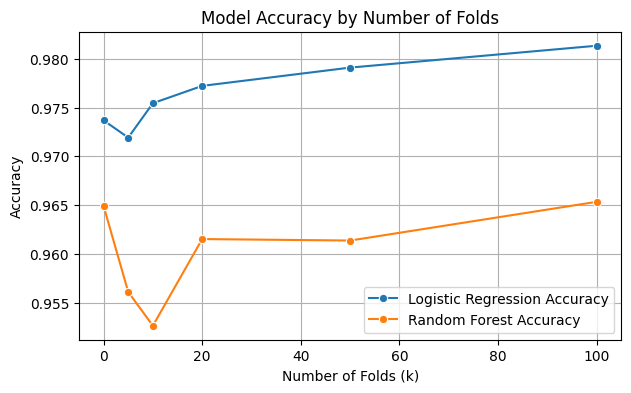

In [12]:
c_cancer
# Checking for Null Values
null_check(c_cancer)
# No Null Values present hence Encoding Categorical Data to Numerical
c_cancer = transform_data(c_cancer)
# The target column in 'diagnosis' hence applying Logistic Regression with and without CV.
c_cancer_results = LogisticRegressionCV(c_cancer, 'diagnosis', [0,5,10,20,50,100])
# Displaying the graph of No. of Folds vs Accuracy
plot_model_accuracy_graph(c_cancer_results)

### Interpretation:
As can be interpreted from the graph above, using CV yielded better results for Logistic Regression, but did not make much of an impact for Random Forest as the Algorithm is far more complex.
However, a point of concern is that Logistic Regression has a better accuracy than Random Forest which means that the model is overfitting on Logistic Regression, or another valid explanation can be that the problem was better mapped by Logistic Regression than it was for Random Forest.

## Dataset 2 : Mice Protein Expression Dataset (Classification)

Column Name: MouseID
Column DataType: object
Column unique values: ['309_1' '309_2' '309_3' ... 'J3295_13' 'J3295_14' 'J3295_15']
Column has null: False


Column Name: DYRK1A_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: ITSN1_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: BDNF_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: NR1_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: NR2A_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: pAKT_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: pBRAF_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: pCAMKII_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: pCREB_N
Column DataType: float64
Column has null: True
Column Null Count: 3


Column Name: pELK_N
Column D

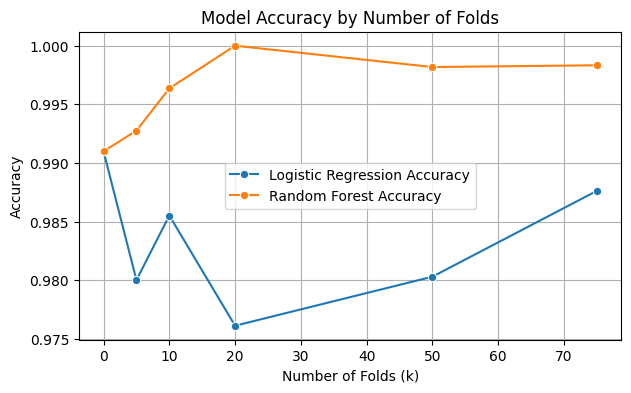

In [16]:
c_mice_expression
# Checking for Null Values
null_check(c_mice_expression)
# Null Values present hence Removing the data
clean_data(c_mice_expression,[])
# Encoding Categorical Data to Numerical
c_mice_expression = transform_data(c_mice_expression)
# The target column in 'class' hence applying Logistic Regression with and without CV.
c_mice_expression_results = LogisticRegressionCV(c_mice_expression, 'class', [0,5,10,20,50,75])
# Displaying the graph of No. of Folds vs Accuracy
plot_model_accuracy_graph(c_mice_expression_results)

### Interpretation:
The graph above shows the impact of using CV on the dataset. For Logistic Regression, the accuracy was better without CV, however, the accuracy decreased but then improved as the number of folds increased. One possible explanation for this can be that the data has 7 target classes and approximately 500 rows after data cleaning is performed. Hence when CV is used, there is a small chunk of data available to train the model from, hence the reduced accuracy. However, as the number of folds increase, the data available for training increases and hence accuracy increases as well as there is more data to train the model on. For Random Forest, without using CV, the model was overfitting on Training data hence the reduced accuracy, however, as CV helps models avoid overfitting, the test accuracy started increasing as the number of folds increased.

## Dataset 3 : Adult Income Dataset (Classification)

Column Name: age
Column DataType: float64
Column has null: False


Column Name: workclass
Column DataType: int32
Column unique values: [5 4 2 0 1 3 6]
Column has null: False


Column Name: fnlwgt
Column DataType: float64
Column has null: False


Column Name: education
Column DataType: int32
Column unique values: [ 9 11  1 12  6 15  7  5 10  8 14  4  0 13  2  3]
Column has null: False


Column Name: education-num
Column DataType: float64
Column has null: False


Column Name: marital-status
Column DataType: int32
Column unique values: [4 2 0 3 5 1 6]
Column has null: False


Column Name: occupation
Column DataType: int32
Column unique values: [ 0  3  5  9  7 11 13  4  6 12  2 10  1  8]
Column has null: False


Column Name: relationship
Column DataType: int32
Column unique values: [1 0 5 3 4 2]
Column has null: False


Column Name: race
Column DataType: int32
Column unique values: [4 2 1 0 3]
Column has null: False


Column Name: sex
Column DataType: int32
Column unique values: [1 0]
Colu

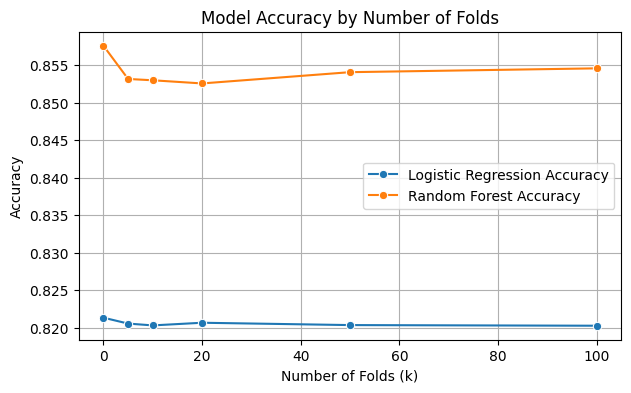

In [24]:
c_adult_income
# Checking for Null Values
null_check(c_adult_income)
# Null Values present hence Removing the data
clean_data(c_adult_income,[])
# Encoding Categorical Data to Numerical
c_adult_income = transform_data(c_adult_income)
# The target column in 'class' hence applying Logistic Regression with and without CV.
c_adult_income_results = LogisticRegressionCV(c_adult_income, 'income', [0,5,10,20,50,100])
# Displaying the graph of No. of Folds vs Accuracy
plot_model_accuracy_graph(c_adult_income_results)

### Interpretation:
The graph above shows the impact of using CV on the dataset. For Logistic Regression, the accuracy was some what constant as the data size was pretty large, hence even without cross validation, the model did not overfit. For Random Forest, the initial rise in accuracy and then the decrease can be explained by the fact that initially, the algorithm did overfit, but when CV was used, the generaliseability of the model improved and hence Accuracy decreased.

# Regression Datasets

## Dataset 4 : Life Expectancy Dataset (Regression)

Column Name: Country
Column DataType: object
Column unique values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mo

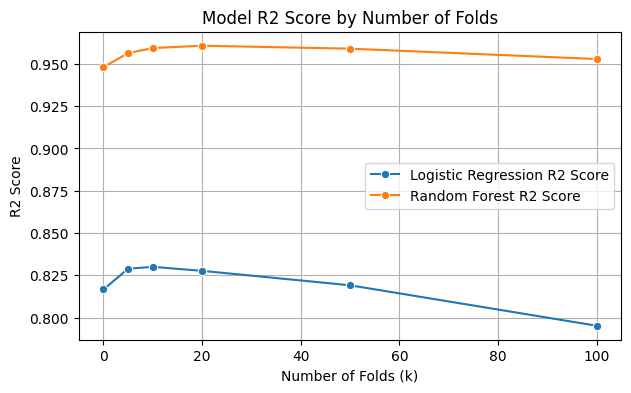

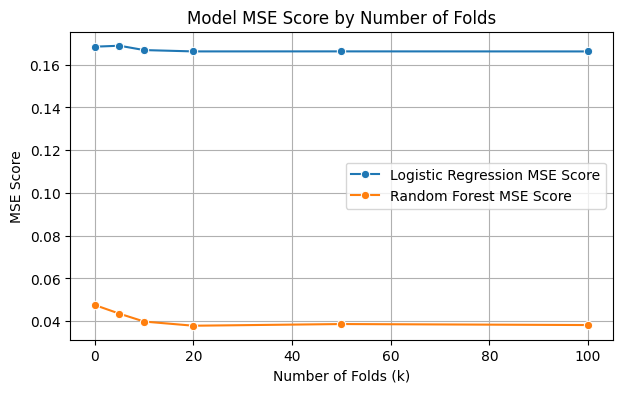

In [31]:
r_life_expectancy
# Checking for Null Values
null_check(r_life_expectancy)
# Null Values present hence Removing the data
clean_data(r_life_expectancy,[])
# Encoding Categorical Data to Numerical
r_life_expectancy = transform_data(r_life_expectancy)
# The target column in 'class' hence applying Logistic Regression with and without CV.
r_life_expectancy_results = LinearRegressionCV(r_life_expectancy, 'Life expectancy ', [0,5,10,20,50,100])
# Displaying the graph of No. of Folds vs R2
plot_model_r2_graph(r_life_expectancy_results)
# Displaying the graph of No. of Folds vs MSE
plot_model_mse_graph(r_life_expectancy_results)

### Interpretation:


## Dataset 4 : Life Expectancy Dataset (Regression)